# Исследование гипотез по увеличению выручки интернет-магазина

Для проведения работы совместно с отделом маркетинга был подготовлен список гипотез. В рамках данного исследования планируется выполнить следующие этапы:

1. Провести приоритизацию составленных ранее гипотез;
    1. Провести приоритизацию используя ICE фреймворк;
    2. Провести приоритизацию, используя RICE фреймворк;
    3. Проанализировать получившиеся результаты и отобрать наиболее перспективные гипотезы;
2. Провести анализ проведенного A/B-теста;
    1. Построить графики кумулятивной выручки, среднего чека и среднего количества заказов;
    2. Построить графики относительного изменения кумулятивного среднего чека и среднего количества заказов между группами;
    3. Проанализировать аномальные значения в имеющихся данных;
    4. Проанализировать статистическую значимость различий по "сырым" и "очищенным данным";
    5. Сделать итоговый вывод и принять решение о будущем теста.

### Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
def check_df (df):

    display(df.info())

    display(df.head(10))

In [3]:
hyp_data = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
pd.options.display.max_colwidth = 130
check_df(hyp_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# Приведем названия столбцов к нижнему регистру для удобства
hyp_data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [6]:
hyp_data['ICE'] = ((hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts']).round(2)

In [7]:
display(hyp_data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE наиболее приоритетными стали гипотезы "запустить акцию на скидку в день рождения", "добавить два новых канала привлечения трафика" и "добавить форму подписки на все основные страницы" они же лидеры по столбцу impact, посмотрим, что покажут результаты второй приоритизации.

In [8]:
hyp_data['RICE'] = (hyp_data['reach'] * hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts']
display(hyp_data[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с третьего места заняла первое с двукратным отрывом от гипотезы "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", которая занимала ранее пятое место. 

Фреймворк RICE показывает, что приоритизация гипотез сильно поменялась для гипотез, занявших первые пять мест по фреймворку ICE. На первые места вышли гипотезы с высоким показателем охвата, однако гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" не смотря на относительно низкий показатель охвата заняла третье место, а гипотезе "Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар" не помог даже высокий показатель охвата, усилия на ее тест слишком высоки по отношению к влиянию на опыт пользователей.

Таким образом, первыми необходимо проверить гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

### Часть 2. Анализ A/B-теста

Загрузим результаты A/B-теста для анализа его результатов.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
check_df(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [12]:
check_df(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Изменим тип данных в столбце date в обоих датафреймах и приведем названия столбцов к нижнему регистру.

In [13]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
check_df(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [15]:
check_df(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [16]:
display(visitors.duplicated().sum())

0

In [17]:
display(orders.duplicated().sum())

0

In [18]:
display(orders['transaction_id'].duplicated().sum())

0

Дубликаты в данных не обнаружены. Можно переходить к построению графиков.

Подготовим данные для построения графиков кумулятивной выручки и среднего чека.

In [19]:
# Подготовим данные для построения графиков

datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [20]:
print('Максимальная дата в исходном датафрейме:', orders['date'].max())
print('Минимальная дата в исходном датафрейме:', orders['date'].min())
print('Максимальная дата в созданном датафрейме:', cumulativeData['date'].max())
print('Минимальная дата в созданном датафрейме:', cumulativeData['date'].min())

Максимальная дата в исходном датафрейме: 2019-08-31 00:00:00
Минимальная дата в исходном датафрейме: 2019-08-01 00:00:00
Максимальная дата в созданном датафрейме: 2019-08-31 00:00:00
Минимальная дата в созданном датафрейме: 2019-08-01 00:00:00


Даты совпадают, все отлично.

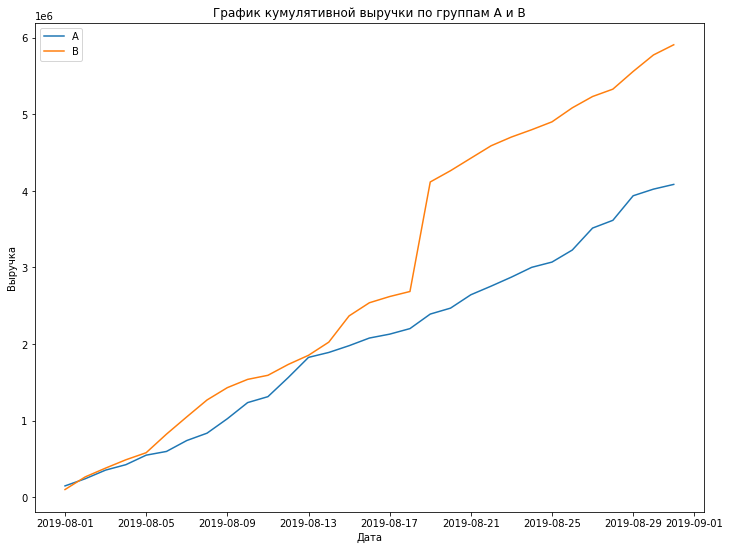

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,9))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()


По графику кумулятивной выручки группа В незначительно превосходит группу А, однако после 08.19 выручка группы B значительно выросла. Среди причин этого роста может быть значительное увеличение числа заказов пользователей в этот день или среднего чека, возможно, это результат действий отдела маркетинга, высокая скидка на дорогой товар привлекла пользователей, в следствие чего больше пользователей купили данный товар, или отдельные пользователи закупили товар в большом количестве, тем самым возрос средний чек.

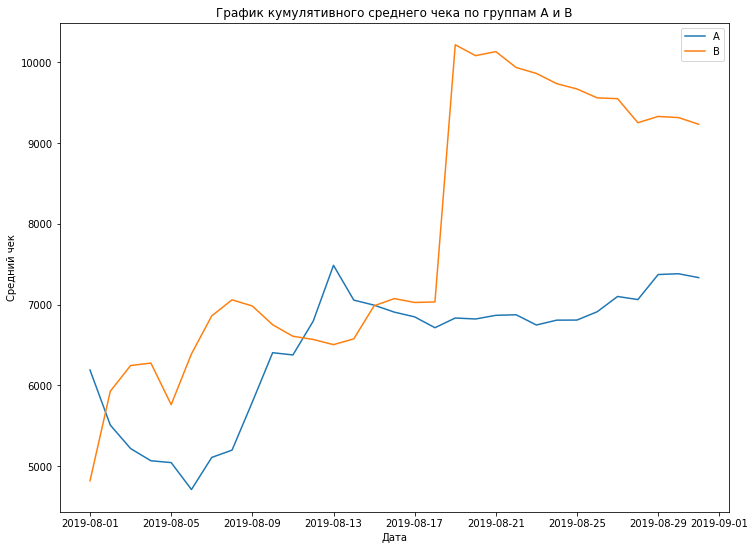

In [22]:
# Построим графики кумулятивного среднего чека
plt.figure(figsize=(12,9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 

По графику кумулятивного среднего чека можно заметить, что в некоторых днях присутствуют аномально большие значения. Так в группе A это 08.13, когда график достиг своего максимума, также у группы B 08.19, когда значение почти удвоилось.

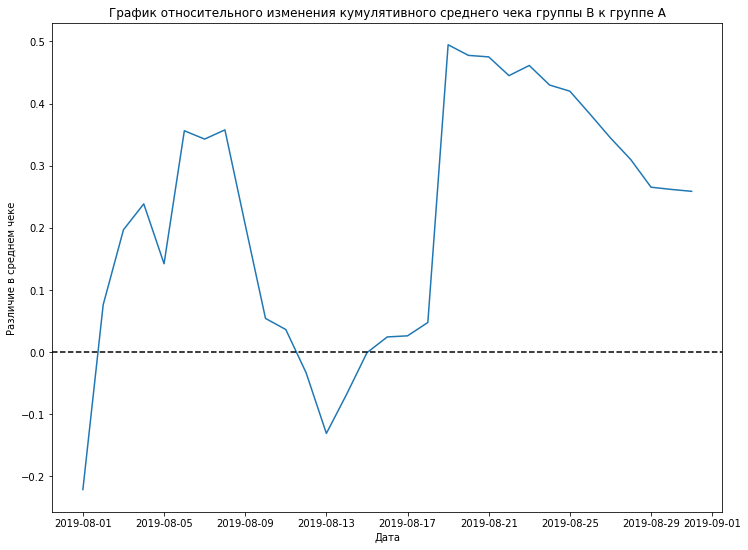

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,9))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Различие в среднем чеке')
plt.axhline(y=0, color='black', linestyle='--')

По графику видно, что средний чек группы В на протяжении почти всего периода превышает значения группы А на 10 и более процентов. И лишь 08.13 средний чек группы В меньше, что, вероятно, связано с аномально большим значением в этот день у группы А, что подтверждается предыдущим графиком.

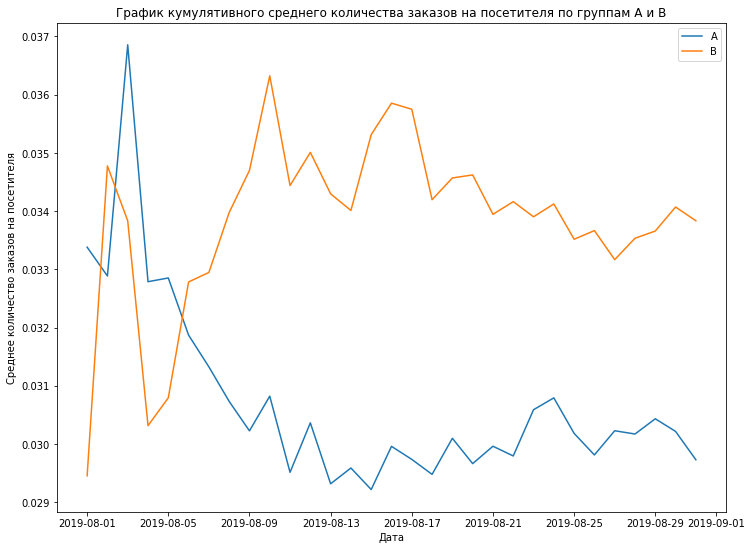

In [24]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()



Группа В также превосходит группу А по среднему количеству заказов на посетителя на большем отрезке примерно на 0.005 пунктов. В целом это подтверждает превосходство группы В над группой А.

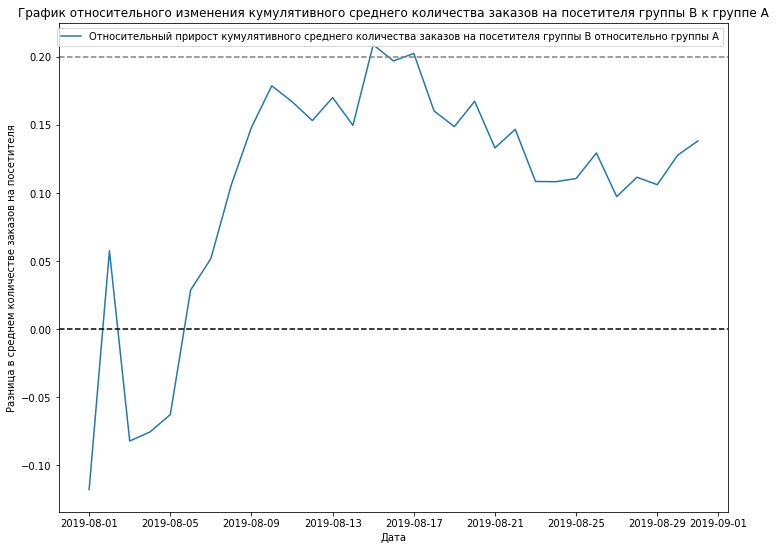

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')# cтроим отношение средних чеков

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Разница в среднем количестве заказов на посетителя')
plt.legend()

Данный график также показывает превосходство среднего количества заказов, относительный прирост среднего количества заказов в группе В колеблется от 10 до 20 процентов.

Text(0, 0.5, 'Количество заказов')

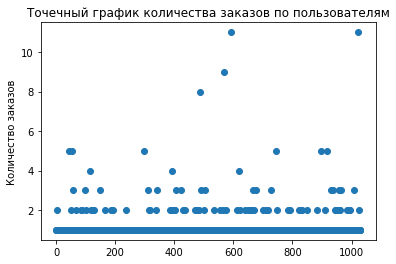

In [26]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'}))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

Наибольшее количество пользователей делает один или два заказа, пользователи, которые делают больше двух заказов малочисленны.

Посчитаем 90-й, 95-й и 99-й персентили, чтобы точно рассчитать показатели для определения данных как аномальных.

In [27]:
print(np.percentile(ordersByUsers['transaction_id'], [90, 95, 99])) 

[1. 2. 4.]


Обозначим пользователей с количеством заказов более 4 как аномальных, таким образом мы отбросим 1% пользователей, не навредив точности данных.

Text(0, 0.5, 'Выручка')

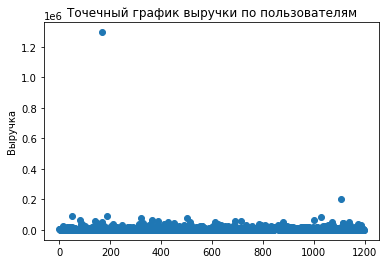

In [28]:
revenueByOrders = (orders.groupby('transaction_id', as_index=False).agg({'revenue': 'sum'}))
x_values = pd.Series(range(0, len(revenueByOrders)))
plt.scatter(x_values, revenueByOrders['revenue'])
plt.title('Точечный график выручки по пользователям')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

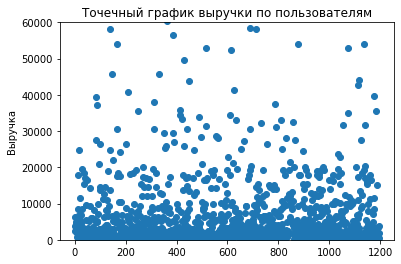

In [29]:
revenueByOrders = (orders.groupby('transaction_id', as_index=False).agg({'revenue': 'sum'}))
x_values = pd.Series(range(0, len(revenueByOrders)))
plt.scatter(x_values, revenueByOrders['revenue'])
plt.ylim(0, 60000)
plt.title('Точечный график выручки по пользователям')
plt.ylabel('Выручка')

Ограничив график по значению выручки, можно заметить, что в большинстве случаев выручка с заказа составляет менее 20 000 рублей. Значения более 40 000 уже становятся единичными случаями. 

In [30]:
print(np.percentile(revenueByOrders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Обозначим пользователей с выручкой более 58233,2 тысяч как аномальных, таким образом, отсечем от 1% пользователей.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Для проверки двух гипотез обозначим:
1. Совершают ли пользователи группы В больше заказов, чем пользователи группы А?
    1. Н0 - среднее количество заказов на пользователя группы B равно среднему количеству заказов на пользователя группы А;
    2. Н1 - среднее количество заказов на пользователя группы В не равно среднему количеству заказов на пользователя группы А;
2. Совершают ли пользователи группы В заказы на большую сумму, чем пользователи группы А?
    1. Н0 - средний чек пользователя группы В равен среднему чеку пользователя группы А;
    2. Н1 - средний чек пользователя группы В не равен среднему чеку пользователя группы А;

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value:',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный выигрыш группы В над группой А:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Относительный выигрыш группы В над группой А: 0.138


Анализ необработанных данных по количеству заказов на пользователя показывает, что мы можем отвергнуть нулевую гипотезу о равенстве количества заказов для двух групп. Также относительный выигрыш группы В над группой А составляет 13,8%.

Проверим гипотезу об отсутствии различия в среднем чеке между двумя группами.

In [33]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный выигрыш группы В над группой А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный выигрыш группы В над группой А: 0.259


Уровень p-value превышает 0.05, это значит, что мы не можем отвергнуть нулевую гипотезу об отсутствии статистически значимых различий в среднем чеке между группами, но до обработки выбросов относительный выигрыш в среднем чеке группы В над группой А составляет 25%.

Произведем обработку данных, удалим пользователей, признанных нами ранее аномальными.

In [34]:
# Очистим данные от выбросов

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transaction_id'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transaction_id'], 99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(revenueByOrders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
15


In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Вновь посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке.

Напомним гипотезы:
1. Совершают ли пользователи группы В больше заказов, чем пользователи группы А?
    1. Н0 - среднее количество заказов на пользователя группы B равно среднему количеству заказов на пользователя группы А;
    2. Н1 - среднее количество заказов на пользователя группы В не равно среднему количеству заказов на пользователя группы А;
2. Совершают ли пользователи группы В заказы на большую сумму, чем пользователи группы А?
    1. Н0 - средний чек пользователя группы В равен среднему чеку пользователя группы А;
    2. Н1 - средний чек пользователя группы В не равен среднему чеку пользователя группы А;

In [36]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы В над группой А:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.014
Относительный выигрыш группы В над группой А: 0.153


Значение p-value уменьшилось на 0.003, результат все еще позволяет отвергнуть нулевую гипотезу об отсутствии различий в среднем количестве заказов. Относительное превосходство группы B над группой A составляет 15,3%, результаты на сырых данных показали 13,8%.


In [37]:
print(
    'P-value:'
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный выигрыш группы В над группой А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value:0.851
Относительный выигрыш группы В над группой А: -0.006


Анализ очищенных данных по различию средних чеков двух групп показывает значительное изменение, значение p-value также больше 0.05, что не позволяет нам отвергнуть нулевую гипотезу, зато превосходство группы B над группой А в 25% после очистки данных от выбросов превратилось в отставание группы B от группы А на 0,6%.

**Выводы по А/В-тесту:**

**После проведенного анализа результатов А/В-теста делается вывод о том, что А/В-тест нужно остановить и признать победу группы В.**

Статистически значимых различий в среднем чеке двух групп после очистки данных от выбросов обнаружено не было, основой решения становится преимущество группы В над группой А по среднему количеству заказов на пользователя, результаты показали, что нулевая гипотеза отвергается, а относительный выигрыш группы В над группой А составляет 15,3%, что позволяет говорить о значимом превосходстве. Построенные ранее графики и выводы по ним подтверждают целесообразность данного решения.